In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Eval transformation functions

def most_common(lst): 
    return max(set(lst), key = lst.count)

def reveal_bias(url):
    path = url.split('/', 1)[1]
    apps = re.sub('[/-]', ' ',path).split()[:-1]
    return most_common(apps)

def add_bias_labels(col_lst):
    for i in range(len(col_lst)):
        col_lst[i] = col_lst[i] + "-bias-" + reveal_bias(col_lst[i])
    return col_lst

In [3]:
final_ex_all_1_df = pd.read_parquet("./Auto-scaling-results/final_ex/final-ex-all-1/final-ex-all-1.parquet")
final_ex_2X3_df = pd.read_parquet("./Auto-scaling-results/final_ex/final-ex-2X3/final-ex-2X3.parquet")
final_ex_3X3_df = pd.read_parquet("./Auto-scaling-results/final_ex/final-ex-3X3/final-ex-3X3.parquet")
final_ex_4X3_df = pd.read_parquet("./Auto-scaling-results/final_ex/final-ex-4X3/final-ex-4X3.parquet")

In [4]:
final_ex_all_1_df

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers
0,0.020,198,200,/3/4-3/42,2019-09-24 19:39:18,1,1,1,1
1,0.021,207,200,/3/4-2-2/38,2019-09-24 19:39:18,1,1,1,1
2,0.035,217,200,/2/2-2-3-2/126,2019-09-24 19:39:18,1,1,1,1
3,0.314,188,200,/4/3/65,2019-09-24 19:39:18,1,1,1,1
4,0.320,217,200,/3/4-2-3-4/56,2019-09-24 19:39:18,1,1,1,1
...,...,...,...,...,...,...,...,...,...
146620,60.002,345,504,/3/3-3/110,2019-09-24 21:36:04,1,1,1,1
146621,None,None,110,/4/2-3-3-4/64,2019-09-24 21:36:04,1,1,1,1
146622,None,None,110,/3/3-3/110,2019-09-24 21:36:04,1,1,1,1
146623,60.001,345,504,/4/4-3/224,2019-09-24 21:36:04,1,1,1,1


In [5]:
final_ex_all_1_df.resp_time = final_ex_all_1_df.resp_time.astype(float)
final_ex_2X3_df.resp_time = final_ex_2X3_df.resp_time.astype(float)
final_ex_3X3_df.resp_time = final_ex_3X3_df.resp_time.astype(float)
final_ex_4X3_df.resp_time = final_ex_4X3_df.resp_time.astype(float)

In [6]:
'''
ex_1_df = pd.get_dummies(ex_1_df, columns = ['url'])
ex_2_df = pd.get_dummies(ex_2_df, columns = ['url'])
'''

"\nex_1_df = pd.get_dummies(ex_1_df, columns = ['url'])\nex_2_df = pd.get_dummies(ex_2_df, columns = ['url'])\n"

In [7]:
final_ex_all_1_df.resp_time.mean()

15.873369294605812

In [8]:
final_ex_2X3_df.resp_time.mean()

15.973676881326995

In [9]:
final_ex_3X3_df.resp_time.mean()

7.985083527448301

In [10]:
final_ex_4X3_df.resp_time.mean()

16.236601372952617

In [11]:
url_features = final_ex_3X3_df.url.unique().tolist()

In [12]:
bias_lst = add_bias_labels(url_features)

In [13]:
bias_2 = [x[:-7] for x in bias_lst if "bias-2" in x]
bias_3 = [x[:-7] for x in bias_lst if "bias-3" in x]
bias_4 = [x[:-7] for x in bias_lst if "bias-4" in x]

In [14]:
def is_bias(url, lst):
    if url in lst:
        return True
    else:
        return False

In [ ]:
bias_2

In [16]:
for df in [final_ex_all_1_df, final_ex_2X3_df, final_ex_3X3_df, final_ex_4X3_df]:
    df["bias_2"] = df["url"].apply(lambda x: is_bias(x, bias_2))
    df["bias_3"] = df["url"].apply(lambda x: is_bias(x, bias_3))
    df["bias_4"] = df["url"].apply(lambda x: is_bias(x, bias_4))

In [ ]:
final_ex_all_1_df

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

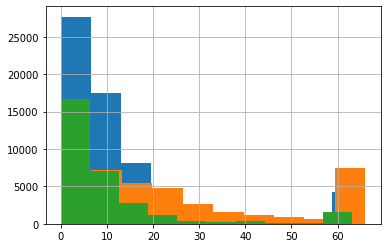

In [18]:
final_ex_all_1_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

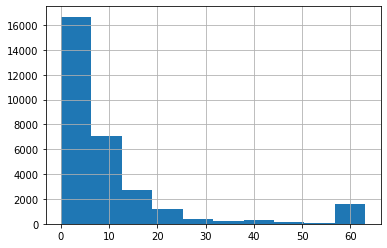

In [19]:
final_ex_all_1_df[final_ex_all_1_df["bias_2"] == True].resp_time.hist()

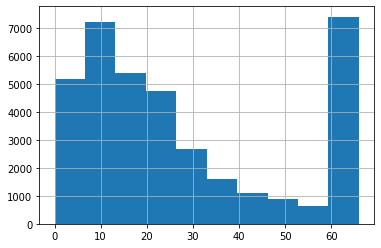

In [20]:
final_ex_all_1_df[final_ex_all_1_df["bias_3"] == True].resp_time.hist()

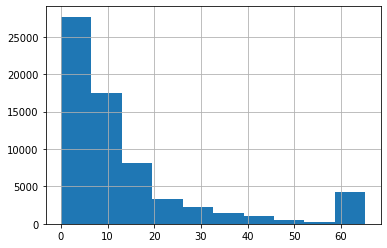

In [21]:
final_ex_all_1_df[final_ex_all_1_df["bias_4"] == True].resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

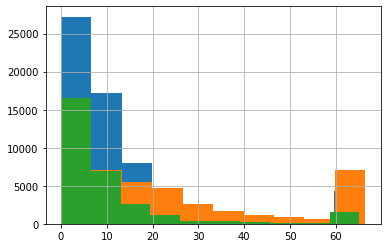

In [22]:
final_ex_2X3_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

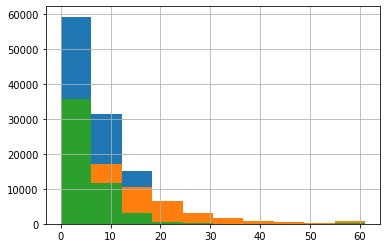

In [23]:
final_ex_3X3_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

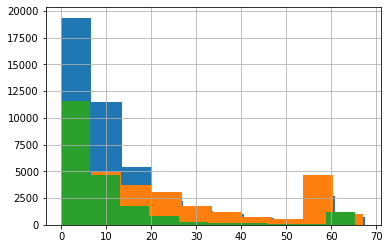

In [24]:
final_ex_4X3_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()